In [1]:
# モジュールのインポート
import tensorflow as tf
from tensorflow.keras import layers, models, utils, optimizers, losses, metrics
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# データセットの読み込み(cifar10)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# 0～255で表されているピクセルの値を255で割って値を0～1のデータに正規化
train_images = train_images / 255.0
test_images = test_images / 255.0
# one-hotベクトルの作成
# 10カテゴリーある場合に、正解ラベルが5番目のデータは[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]のように表現する
train_labels = utils.to_categorical(train_labels, num_classes=10)
test_labels = utils.to_categorical(test_labels, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
# 数値が0じゃない場所を1にして表示している
(mnist_train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
new_image = tf.where(mnist_train_images[0] > 0, 1, 0)
new_image = tf.reshape(new_image, [28, 28])
print(new_image)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
tf.Tensor(
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0

In [ ]:
# AIのモデル定義
def build_model():
    input = layers.Input(shape = (32, 32, 3)) # 入力の形状を指定して受け取る

    x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = "same")(input) # 畳み込み層(入力の画像は半分の大きさになり、チャンネル数はfiltersの大きさになる)
    x = layers.LeakyReLU()(x) # reluから進化したleakyreluを使用

    x = layers.Flatten()(x) # 一次元化
    output = layers.Dense(units=10, activation="softmax")(x) # 出力数10の全結合層,活性化関数はsoftmaxを指定
    return models.Model(input, output)

model = build_model() # モデルを構築し、変数に代入
model.summary() # モデルの形状を確認

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        81,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,826 (323.54 KB)

 Trainable params: 82,826 (323.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10 # 学習反復回数
model.compile(loss = losses.CategoricalCrossentropy(), # lossの指定
              optimizer = optimizers.Adam(learning_rate = 0.001), # optimizerの指定
              metrics = [metrics.CategoricalAccuracy()]) # 評価関数の指定
history = model.fit(x=train_images, y=train_labels, batch_size=8, epochs=epochs, validation_data=(test_images, test_labels)) # モデルの学習

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - categorical_accuracy: 0.3804 - loss: 1.7534 - val_categorical_accuracy: 0.4434 - val_loss: 1.5708
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - categorical_accuracy: 0.5082 - loss: 1.4124 - val_categorical_accuracy: 0.5158 - val_loss: 1.3751
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - categorical_accuracy: 0.5437 - loss: 1.3025 - val_categorical_accuracy: 0.5215 - val_loss: 1.3623
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - categorical_accuracy: 0.5653 - loss: 1.2408 - val_categorical_accuracy: 0.5245 - val_loss: 1.3724
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - categorical_accuracy: 0.5898 - loss: 1.1800 - val_categorical_accuracy: 0.5166 - val_loss: 1.3813
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - categorical_accuracy: 0.6056 - loss: 1.1365 - val_categorical_accuracy: 0.5410 - val_loss: 1.3187
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - categorical_a

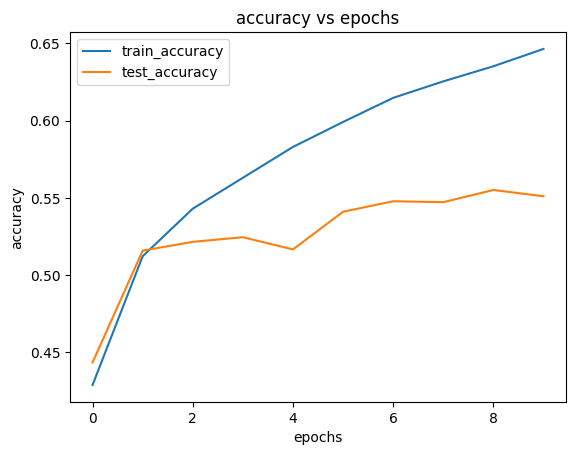

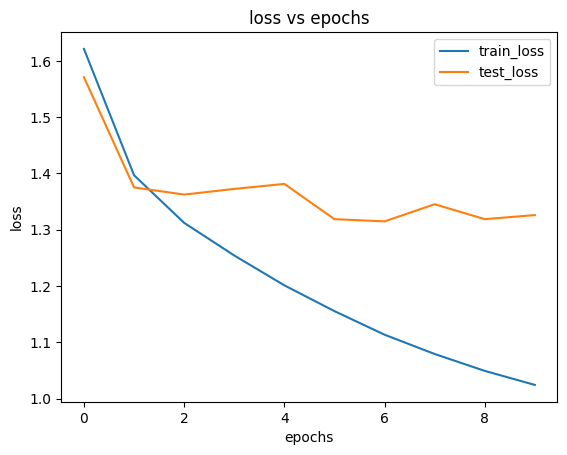

In [ ]:
# accuracyやlossを受け取る
accuracy, loss, val_accuracy, val_loss = history.history.values()

# グラフの出力
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("accuracy vs epochs") # タイトル
ax.plot(range(epochs), accuracy, label="train_accuracy") # 折れ線グラフ(引数は順にx,y,label)
ax.plot(range(epochs), val_accuracy, label="test_accuracy")# 折れ線グラフ(引数は順にx,y,label)
ax.set_xlabel("epochs") # x軸のラベル
ax.set_ylabel("accuracy") # y軸のラベル
ax.legend() # 折れ線グラフのラベルを表示
plt.show() # グラフの出力
# 上と同じ
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("loss vs epochs")
ax.plot(range(epochs), loss, label="train_loss")
ax.plot(range(epochs), val_loss, label="test_loss")
ax.set_xlabel("epochs")
ax.set_ylabel("loss")
ax.legend()
plt.show()

8510番目の画像
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


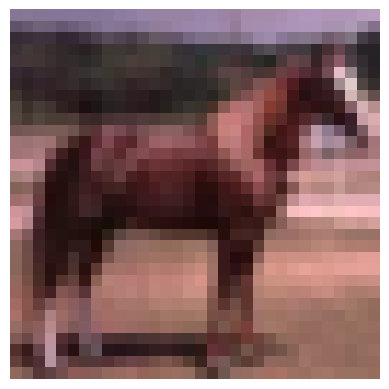

正解のラベル：7
予測のラベル：7


In [ ]:
# ランダムで整数を一つ生成
idx = np.random.randint(len(test_images))
print(f"{idx}番目の画像")
# 学習したモデルに画像を入力して推論結果を保存
result = model.predict(test_images[idx][tf.newaxis])

# 画像の見た目を確認
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(test_images[idx])
ax.axis("off")
plt.show()

number2label = {0:"飛行機", 1:"自動車", 2:"鳥", 3:"猫", 4:"鹿", 5:"犬", 6:"カエル", 7:"馬", 8:"船", 9:"トラック"}

# 正解のラベルとAIが予測したラベルを比べる
print(f"正解のラベル：{number2label[np.argmax(test_labels[idx])]}")
print(f"予測のラベル：{number2label[np.argmax(result)]}")